# MOD 300: Assignment 3

**Basel Abu Sablih, Anders Bygdås and Aleksander Bø**

Date: **Oct 27, 2025**


In [14]:
# Import required packages
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import dna
import math

# TOPIC 1: Calculate DNA volume via Monte Carlo simulation.


**Task 0**

We define a simulation box in 3d space by specifying its upper bound. Since we are dealing with DNA, we chose to use nanometer as unit.


In [15]:
box = dna.SimulationBox(20,20,20)

**Task 1**


We create a random point inside the simulation box using uniform distribution.


In [16]:
point = dna.create_random_point(box)

**Task 2**

We use our function for creating an random sphere inside the box.


In [17]:
sphere = dna.create_random_sphere(box)
print(sphere)


SPHERE X: 10.85 Y: 8.45 Z: 11.68 Radius: 7.7


**Task 3**

We have defined an function that checks if a point is inside an sphere. To check that our function actually works, we manually define two points, one that is at the sphere center (inside point) and one that is just outside the radius (outside point)


In [18]:
point_inside = dna.Point(sphere.center.x, sphere.center.y, sphere.center.z)
point_outside = dna.Point(sphere.center.x + sphere.radius + 1, sphere.center.y, sphere.center.z)

assert sphere.is_point_inside(point_inside), "This point should be inside!"
assert not sphere.is_point_inside(point_outside), "The point should be outside!"

print("Function works!")


Function works!


**Task 4**


We estimate the fraction of randomly generated points that are inside a sphere using a Monte Carlo simulation. The simulation generates points uniformly inside the simulation box and counts how many points are contained in the sphere. The fraction is calculated as:

$$
\text{Fraction} = \frac{\text{Number of points inside the sphere}}{\text{Total number of points}}
$$


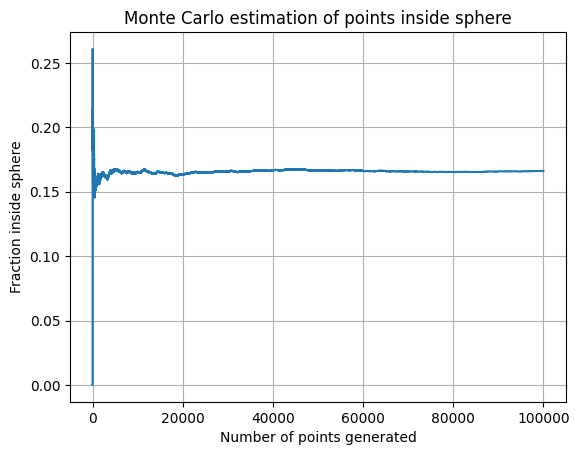

In [19]:
fraction_estimate = dna.monte_carlo_fraction_inside_sphere(sphere, box, plot=True)

We compare the Monte Carlo estimate of the fraction of points inside the sphere with the theoretical expectation. The expected fraction is calculated as the ratio of the sphere’s volume to the simulation box’s volume:


In [20]:
expected_fraction = sphere.get_volume() / box.get_volume()

print("Expected (volume ratio):", expected_fraction)
print("Monte Carlo result:", fraction_estimate)

Expected (volume ratio): 0.23940858972224385
Monte Carlo result: 0.24173


# Task 5


We estimate π by randomly generating points inside a cube and checking how many end up inside a sphere. The sphere is as big as possible so that more random points will end up inside the sphere and it gives better statistical accuracy.


In [21]:
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]

box = dna.SimulationBox(20, 20, 20)
sphere = dna.Sphere(dna.Point(10, 10, 10), 10)

for sample_size in sample_sizes:
    print(dna.estimate_pi(sample_size, sphere, box))

4.800000000000001
2.58
3.234
3.1464
3.1464
3.1365000000000003
3.1365000000000003
3.14055
3.14055


# Task 6

Generate 10 random spheres in the simulation box

In [22]:
box = dna.SimulationBox(20, 20, 20)

spheres = [dna.create_random_sphere(box) for _ in range(10)]

for i, sphere in enumerate(spheres, 1): 
    print(f"Sphere {i}: {sphere}")

Sphere 1: SPHERE X: 5.71 Y: 7.74 Z: 10.24 Radius: 2.8
Sphere 2: SPHERE X: 8.45 Y: 7.91 Z: 11.77 Radius: 5.81
Sphere 3: SPHERE X: 10.41 Y: 3.64 Z: 3.24 Radius: 2.54
Sphere 4: SPHERE X: 12.71 Y: 10.02 Z: 14.93 Radius: 3.11
Sphere 5: SPHERE X: 10.06 Y: 9.61 Z: 9.59 Radius: 9.42
Sphere 6: SPHERE X: 10.42 Y: 10.08 Z: 10.72 Radius: 8.66
Sphere 7: SPHERE X: 5.24 Y: 9.84 Z: 12.29 Radius: 3.67
Sphere 8: SPHERE X: 6.06 Y: 11.99 Z: 6.14 Radius: 4.17
Sphere 9: SPHERE X: 10.11 Y: 10.36 Z: 9.9 Radius: 9.5
Sphere 10: SPHERE X: 10.32 Y: 10.52 Z: 10.17 Radius: 9.41


# Task 7

Calculate and plot the fraction of points INSIDE the sphere divided by the number of randomly generated points. 

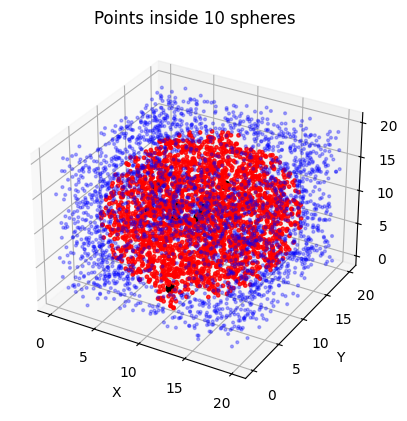

In [23]:
fractions = dna.fraction_inside_sphere(spheres, box, n_points=100_000, plot=True);

## Task 8

Read the DNA coordinates file and assign atomic radii to each atom based on the periodic table.


We use van der Waals radii (in Angstroms) for each element to determine the size of each atomic sphere.


In [24]:
# Read the DNA coordinates file
atoms = dna.read_dna_coordinates('dna_coords.txt')

# Display information about the first few atoms
print(f"Total atoms: {len(atoms)}")
print("\nFirst 10 atoms:")
for i, atom in enumerate(atoms[:10]):
    print(f"Atom {i+1}: Element={atom['element']}, X={atom['x']:.2f}, Y={atom['y']:.2f}, Z={atom['z']:.2f}, Radius={atom['radius']:.2f} Å")

# Show atomic radii mapping
print("\nAtomic radii mapping:")
for element, radius in dna.ATOMIC_RADII.items():
    print(f"{element}: {radius} Å")


Total atoms: 259

First 10 atoms:
Atom 1: Element=H, X=-48.18, Y=1.75, Z=-1.22, Radius=0.53 Å
Atom 2: Element=O, X=-48.07, Y=1.26, Z=-0.41, Radius=0.48 Å
Atom 3: Element=P, X=-46.63, Y=1.28, Z=-0.00, Radius=0.98 Å
Atom 4: Element=O, X=-46.41, Y=2.54, Z=0.73, Radius=0.48 Å
Atom 5: Element=O, X=-45.84, Y=1.10, Z=-1.24, Radius=0.48 Å
Atom 6: Element=O, X=-46.38, Y=0.04, Z=0.97, Radius=0.48 Å
Atom 7: Element=C, X=-47.32, Y=-0.21, Z=2.04, Radius=0.67 Å
Atom 8: Element=C, X=-46.59, Y=-0.77, Z=3.24, Radius=0.67 Å
Atom 9: Element=O, X=-46.38, Y=-2.20, Z=3.03, Radius=0.48 Å
Atom 10: Element=C, X=-45.19, Y=-0.22, Z=3.50, Radius=0.67 Å

Atomic radii mapping:
H: 0.53 Å
C: 0.67 Å
N: 0.56 Å
O: 0.48 Å
P: 0.98 Å


# References

(Estimating Pi using the Monte Carlo Method) https://www.101computing.net/estimating-pi-using-the-monte-carlo-method/


# Task 9 & 10 — Simulation box and Monte Carlo DNA volume

we are going to build a tight simulation box around the atoms (units consistent: Angstrom -> nm),
then estimate the DNA volume by Monte Carlo sampling of the union of atomic spheres.

In [25]:
# Task 9 — Simulation box (units and containment)
"""
Task 9:
- Read atom coordinates and radii.
- Ensure units are consistent.
- Build a tight simulation box that contains all atomic spheres and print diagnostics.
"""

atoms = dna.read_dna_coordinates('dna_coords.txt')
print(f'Loaded atoms: {len(atoms)}')

# Convert atoms -> spheres.
spheres = dna.atoms_to_spheres(atoms, units='angstrom')

padding_nm = 0.5
box = dna.simulation_box_from_atoms(atoms, units='angstrom', padding_nm=padding_nm)

# Diagnostics
x_size = box.x_upper - box.x_lower
y_size = box.y_upper - box.y_lower
z_size = box.z_upper - box.z_lower
print(f'Box bounds (nm):')
print(f'  x: {box.x_lower:.4f} to {box.x_upper:.4f}  (size {x_size:.4f} nm)')
print(f'  y: {box.y_lower:.4f} to {box.y_upper:.4f}  (size {y_size:.4f} nm)')
print(f'  z: {box.z_lower:.4f} to {box.z_upper:.4f}  (size {z_size:.4f} nm)')
print(f'Box volume: {box.get_volume():.6f} nm^3')

# Quick check: box should be reasonably tight (not orders of magnitude larger than molecule)
max_dim = max(x_size, y_size, z_size)
min_dim = min(x_size, y_size, z_size)
print(f'Max dimension: {max_dim:.4f} nm; Min dimension: {min_dim:.4f} nm')
if max_dim/min_dim > 10:
    print('Warning: box is elongated (ratio > 10).')

Loaded atoms: 259
Box bounds (nm):
  x: -5.3711 to -2.5243  (size 2.8468 nm)
  y: -2.3251 to 0.8022  (size 3.1273 nm)
  z: -1.5472 to 1.5377  (size 3.0849 nm)
Box volume: 27.464240 nm^3
Max dimension: 3.1273 nm; Min dimension: 2.8468 nm


n=  1000  fraction=0.006000  volume(nm^3)=0.164785  (Å^3=164.8)
n=  5000  fraction=0.009400  volume(nm^3)=0.258164  (Å^3=258.2)
n=  5000  fraction=0.009400  volume(nm^3)=0.258164  (Å^3=258.2)
n= 10000  fraction=0.006900  volume(nm^3)=0.189503  (Å^3=189.5)
n= 10000  fraction=0.006900  volume(nm^3)=0.189503  (Å^3=189.5)
n= 25000  fraction=0.008120  volume(nm^3)=0.223010  (Å^3=223.0)
n= 25000  fraction=0.008120  volume(nm^3)=0.223010  (Å^3=223.0)
n= 50000  fraction=0.009320  volume(nm^3)=0.255967  (Å^3=256.0)
n= 50000  fraction=0.009320  volume(nm^3)=0.255967  (Å^3=256.0)


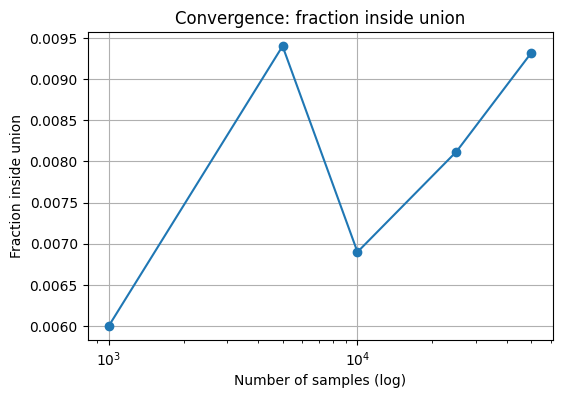

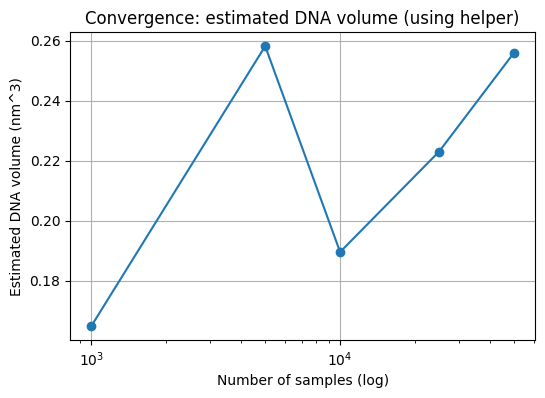


Generating a small 3D visualization


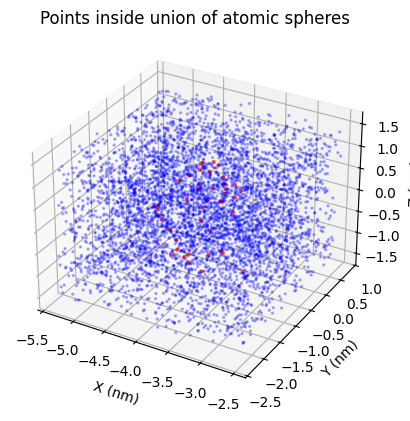


Box volume: 27.464240 nm^3
Sum of individual sphere volumes (upper bound): 0.232509 nm^3 (232.5 Å^3)
Sanity checks:
- Monte Carlo result should be <= sum of individual sphere volumes.


In [26]:
# Task 10 — Monte Carlo estimate of DNA volume (using helper) and plots
"""
This version uses the helper `estimate_dna_volume_from_atoms` to keep the code DRY and reuse the
conversion + box-building logic already implemented in `dna.py`.
"""
# Choose sample sizes for convergence check
sample_sizes = [1000, 5000, 10000, 25000, 50000]
fractions = []
volumes = []
box_volume = None

for n in sample_sizes:
    # estimate_dna_volume_from_atoms returns (fraction, dna_volume_nm3, box_volume_nm3, box, spheres)
    fraction, dna_volume, bv, used_box, used_spheres = dna.estimate_dna_volume_from_atoms(atoms, n_points=n, units='angstrom', padding_nm=padding_nm, plot=False)
    fractions.append(fraction)
    volumes.append(dna_volume)
    box_volume = bv
    print(f'n={n:6d}  fraction={fraction:.6f}  volume(nm^3)={dna_volume:.6f}  (Å^3={dna_volume*1000:.1f})')

# Convergence plots
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(sample_sizes, fractions, marker='o')
plt.xscale('log')
plt.xlabel('Number of samples (log)')
plt.ylabel('Fraction inside union')
plt.title('Convergence: fraction inside union')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(sample_sizes, volumes, marker='o')
plt.xscale('log')
plt.xlabel('Number of samples (log)')
plt.ylabel('Estimated DNA volume (nm^3)')
plt.title('Convergence: estimated DNA volume (using helper)')
plt.grid(True)
plt.show()

# 3D visualization example (smaller sampling for speed)
print('\nGenerating a small 3D visualization')
_ = dna.estimate_dna_volume_from_atoms(atoms, n_points=5000, units='angstrom', padding_nm=padding_nm, plot=True)

# Sanity checks and suggestions
sum_sphere_vol = sum((4/3)*math.pi*(s.radius**3) for s in used_spheres)
print(f'\nBox volume: {box_volume:.6f} nm^3')
print(f'Sum of individual sphere volumes (upper bound): {sum_sphere_vol:.6f} nm^3 ({sum_sphere_vol*1000:.1f} Å^3)')
print('Sanity checks:')
print('- Monte Carlo result should be <= sum of individual sphere volumes.')